In [70]:
import math
import matplotlib.pyplot as plt
from tabulate import tabulate
import numpy as np
import Master_Library_1 as lib

# Answer to Q1

In [68]:
#function definition for Q1
def f(x):
    #because log undefined at x = 0
    if x != 0:
        return math.log(x/2) - math.sin(5*x/2)
    else:
        return f(x+0.0001)

In [78]:
#a0, b0 defines the guess interval [1.5,2.5] and e is the accceptable tolerance
a0,b0,e=1.5,2.5,0.000001

#bracketing for regula falsi
while f(a0)*f(b0)>0:
    a0,b0= lib.bracketing(f,a0,b0)
    
root1, n1 = lib.RegulaFalsi(f,a0,b0)

#redefining a0, b0 for Newton Raphson
a0,b0=1.5,2.5
root2 = lib.NewtonRaphson(f,a0,b0)

data1 =[]
for i in range(len(root1)):
    data1.append(i+1)
    data1.append(root1[i])
    if i<len(root2):
        data1.append(root2[i])
    else:
        data1.append("-")
        
print("Roots found are:")
print("Regula Falsi:", root1[-1])
print("Newton Raphson:", root2[-1])

print("               Convergence comparison")
print("------------------------------------------------------")
headers= ["i", "x_i (Regula Falsi)"," x_i (Newton Raphson)"]
columns = 3
print(f'{headers[0]:<10}{headers[1]: <24}{headers[2]}')
print("------------------------------------------------------")
for first, second, third in zip(data1[::columns],data1[1::columns],data1[2::columns]):
    print(f'{first:<10}{second: <25}{third}')

Roots found are:
Regula Falsi: 2.62314050689124
Newton Raphson: 2.6231403354367266
               Convergence comparison
------------------------------------------------------
i         x_i (Regula Falsi)       x_i (Newton Raphson)
------------------------------------------------------
1         2.021572155153393        2.62213866984568
2         2.6492453735280077       2.623139955546314
3         2.616595012414744        2.6231403354367266
4         2.623210437271243        -
5         2.62314050689124         -


# Answer to Q2

In [83]:
#dzdx
def dzdx(T,z,x):
    return 0.01*(T-20)

#dydx
def dTdx(z,x):
    return z

The x position at which T=100 deg C: 4.42499999999995 m
Scatter plot is the final solution of the given ODE and the curves on either side determine the solution for the lower and higher values of the guess.


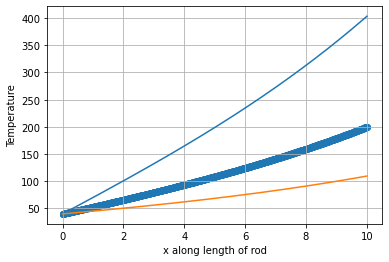

In [84]:
#Answer to Q2

al,be = 40, 200 #boundary conditions 
T,x,zeta=lib.ShootMeth(30,al,be,dzdx,dTdx)
n, sum=0,0

#taking average of all values that lie in the vicinity of 99.9<T<100.1
for i in range(len(T)):
    if abs(100-T[i])<0.1:
        sum=sum+x[i]
        n+=1
print("The x position at which T=100 deg C:", sum/n, "m")
plt.grid()
plt.xlabel("x along length of rod")
plt.ylabel("Temperature")
plt.scatter(x,T)
print("Scatter plot is the final solution of the given ODE and the curves on either side determine the solution for the lower and higher values of the guess.")
plt.show()

# Answer to Q3

Plotting the 1d heat equation at different times


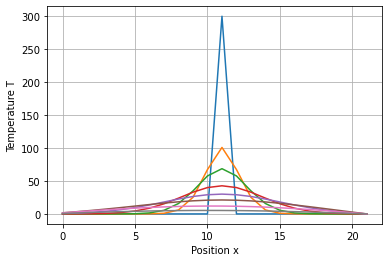

In [90]:
#defining position and time grid nx and nt
nx=20
nt=5000
#defining total length and total time
lx=2
lt=4

'''check that: del x = lx/nx = 0.1
               del t = lt/nt = 0.0005
               thus, del t/(delx)^2 = 0.08'''

temp=[]
#displaying curve at various time steps
X1 = lib.PDEExplicit(0,nx,nt,lx,lt) 
for i in range(len(X1)):
    temp.append(i)

print("Plotting the 1d heat equation at different times")
plt.plot(temp,lib.PDEExplicit(0,nx,nt,lx,lt) )
plt.plot(temp, lib.PDEExplicit(10,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(20,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(50,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(100,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(200,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(500,nx,nt,lx,lt))
plt.plot(temp, lib.PDEExplicit(1000,nx,nt,lx,lt))
plt.xlabel("Position x")
plt.ylabel("Temperature T")
plt.grid()
plt.show()

# Answer to Q4

In [48]:
def lmdnum(x):
    return linmassdens(x)*x

def linmassdens(x):
    return x**2

In [91]:
#Answer to Q3
print("Finding centre of mass through midpoint method of integration:")
print("Through midpoint method:", lib.midmethod(10,2,0,lmdnum) / lib.midmethod(10,2,0,linmassdens))

Finding centre of mass through midpoint method of integration:
Through midpoint method: 1.4962406015037595


# Answer to Q5

In [93]:
#Ans to Q5 using LU Decomposition
f=open('inputQ5.txt','r')
a=[[int(num) for num in line.split(' ')] for line in f]

#u and l are lower and upper matrices of the given augmented matrix of set of linear equations
u,l = lib.UandL(a)

#solving using both LU forward-backward
print("Final solutions [a1,...,a6]:",lib.LUForBack(a,u,l))
f.close()

Final solutions [a1,...,a6]: [-1.761817043997862, 0.8962280338740133, 4.051931404116158, -1.6171308025395421, 2.041913538501913, 0.15183248715593525]
